In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from settings import e
from IPython.display import display
from data_handler import DataHandler
from potential import Potential
from data_merger import DataMerger
from prediction import Prediction
from settings_for_ml import map_weights, POTENTIAL, prediction_dict
from settings import e
from pipeline import dir_to_file_path_list, create_base_prediction

pd.options.display.max_columns=100
pd.options.display.max_rows = 200

dh = DataHandler()
dm = DataMerger()

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


2019-03-23 15:39:30,930:matplotlib.pyplot:DEBUG: Loaded backend module://ipykernel.pylab.backend_inline version unknown.


## create base data for task 2 from random and simple agents

In [8]:
dir_name = "training_data_task2_simple_random_base"
file_list = ["%s/%s" % (dir_name, i) for i in os.listdir(dir_name) if i.endswith(".pickle") and "su1" not in i and "r0" in i ]#and "r0" in i and "su1" not in i]
len(file_list)

80

In [9]:
file_list[0:3]
for  i in file_list: 
    if "su1" in i: print(i)

In [10]:
#df_temp = dh.pickle_to_df(file_list[0])

In [11]:
#(df_temp[df_temp.NAME == "simple_agent"].TARGET_TASK2*100).astype(int)

In [12]:
#df_temp[df_temp.NAME == "simple_agent"][["NAME", "STEP", "TARGET_TASK2", "CUT_OFF_TARGET_TASK2", "MAX_STEP"]].head(20)

In [13]:
#df_temp[df_temp.NAME == "random_agent_1"][["NAME", "STEP", "TARGET_TASK2", "CUT_OFF_TARGET_TASK2", "MAX_STEP"]]

In [14]:
task = "task2"
task1_to_drop = prediction_dict[task]["to_drop"]
target = prediction_dict[task]["target"]
cut_off = prediction_dict[task]["cut_off"]
base_data_name = prediction_dict[task]["base_data_name"]
prediciton_path = prediction_dict[task]["base_prediction_path"]
index = prediction_dict[task]["index"]
prediction_name = prediction_dict[task]["base_prediction_name"]
drop_wait_bomb = prediction_dict[task]["drop_wait_bomb"]
prediction_name = 'p_task2_si.pickle'
base_data_name = 'base_data_task2_si.csv'
target, prediction_name

('TARGET_TASK2', 'p_task2_si.pickle')

In [9]:
target, cut_off, base_data_name, prediciton_path, index, prediction_name

('TARGET_TASK2',
 'CUT_OFF_TARGET_TASK2',
 'base_data_task2_si.csv',
 'agent_code/super_agent/',
 ['GAME', 'NAME', 'STEP'],
 'p_task2_si.pickle')

In [10]:
#p = create_base_prediction(file_list, 
                           base_data_name=base_data_name,
                           target=target, 
                           cut_off=cut_off, 
                           to_drop=task1_to_drop, 
                           index=index, 
                           prediction_path=prediciton_path,
                           prediction_name=prediction_name,
                           drop_wait_bomb=drop_wait_bomb)

2019-03-23 14:05:18,636:std:DEBUG: >> Convert 80 files
2019-03-23 14:05:18,637:std:DEBUG: starting merge_files_to_df
 96%|█████████▋| 77/80 [03:42<00:08,  2.86s/it]2019-03-23 14:09:00,935:std:DEBUG: dh.pickle_to_df start


100%|██████████| 80/80 [03:50<00:00,  2.87s/it]
2019-03-23 14:09:09,551:std:DEBUG: merge_files_to_df: pd.concat: start
2019-03-23 14:09:09,764:std:DEBUG: merge_files_to_df: pd.concat: end
2019-03-23 14:09:09,766:std:DEBUG: >> time to merge files: 231.13 s 
2019-03-23 14:09:09,767:std:DEBUG: >> shape of data: (32070, 71)
2019-03-23 14:09:09,768:std:DEBUG: >> save file to training_data_task2_simple_random_base/base_data_task2_si.csv


Can't drop CUT_OFF_FUTURE_REWARDS0.795 because it is not in the df.
Can't drop CUT_OFF_SURVIVE4 because it is not in the df.
Can't drop FUTURE_REWORDS_DISCOUNT0.795 because it is not in the df.
Can't drop SURVIVE_4STEPS because it is not in the df.
Can't drop CUT_OFF_FUTURE_REWARDS0.795 because it is not in the df.
Can't drop CUT_OFF_SURVIVE4 because it is not in the df.
>> shape of base data  (32070, 71)
>> shape of base data after cut-off  (30390, 71)
The following columns will not be reflected:  {'DOF_DOWN', 'NAME', 'NEXT_EVENT_UP', 'COIN_POTENTIAL_DOWN', 'DOF_UP', 'DANGER_LEVEL_UP', 'GAME', 'NEXT_EVENT_DOWN', 'PREVIOUS_EVENT_WAIT', 'CLOSEST_DISTANCE_BOMB', 'CLOSEST_DISTANCE_COIN', 'RELATIVE_X', 'DEAD_END_UP', 'MAX_COIN_POTENTIAL_DOWN', 'PREVIOUS_EVENT_BOMB', 'PREVIOUS_EVENT_UP', 'CRATES_TO_DESTROY_DOWN', 'CONTACT_TO_EXPLOSION_DOWN', 'CONTACT_TO_EXPLOSION_UP', 'CRATES_TO_DESTROY_UP', 'DEAD_END_DOWN', 'PREVIOUS_EVENT_DOWN', 'DANGER_LEVEL_DOWN', 'MAX_COIN_POTENTIAL_UP', 'COIN_POTENTIA

In [15]:
df = pd.read_csv("%s/%s" % (dir_name, base_data_name), index_col=0)

In [16]:
df.head()

ACTIVE_AGENTS  CLOSEST_DISTANCE_BOMB  CLOSEST_DISTANCE_COIN  \
0              1                    0.0                  0.857   
1              1                    0.0                  0.000   
2              1                    0.0                  0.000   
3              1                    0.0                  0.000   
4              1                    0.0                  0.000   

   CLOSEST_DISTANCE_OTHERS  COIN_POTENTIAL_DOWN  COIN_POTENTIAL_LEFT  \
0                        0                0.666                0.827   
1                        0                0.000                0.000   
2                        0                0.000                0.000   
3                        0                0.000                0.000   
4                        0                0.000                0.000   

   COIN_POTENTIAL_RIGHT  COIN_POTENTIAL_UP  CONTACT_TO_EXPLOSION_CENTER  \
0                 0.666              0.743                            0   
1                 0.000              0.000                            0   
2                 0.000              0.000                            0   
3                 0.000              0.000                            0   
4                 0.000              0.000                            0   

   CONTACT_TO_EXPLOSION_DOWN  CONTACT_TO_EXPLOSION_LEFT  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   CONTACT_TO_EXPLOSION_RIGHT  CONTACT_TO_EXPLOSION_UP  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   

   CRATES_TO_DESTROY_CENTER  CRATES_TO_DESTROY_DOWN  CRATES_TO_DESTROY_LEFT  \
0                         2                       0                       0   
1                         2                       2                       0   
2                         2                       0                       1   
3                         2                       2                       0   
4                         2                       0                       1   

   CRATES_TO_DESTROY_RIGHT  CRATES_TO_DESTROY_UP  CURRENT_SCORE  \
0                        0                     2              0   
1                        0                     0              0   
2                        0                     2              0   
3                        0                     0              0   
4                        0                     2              0   

   CUT_OFF_TARGET_TASK1  CUT_OFF_TARGET_TASK2  DANGER_LEVEL_CENTER  \
0                     0                     0                  0.0   
1                     0                     0                  0.0   
2                     0                     0                  0.0   
3                     0                     0                  0.0   
4                     0                     0                  0.0   

   DANGER_LEVEL_DOWN  DANGER_LEVEL_LEFT  DANGER_LEVEL_RIGHT  DANGER_LEVEL_UP  \
0                0.0                0.0                 0.0              0.0   
1                0.0                0.0                 0.0              0.0   
2                0.0                0.0                 0.0              0.0   
3                0.0                0.0                 0.0              0.0   
4                0.0                0.0                 0.0              0.0   

   DEAD_END_DOWN  DEAD_END_LEFT  DEAD_END_RIGHT  DEAD_END_UP  DOF_DOWN  \
0              0              0               0            1         0   
1              0              0               0            0         2   
2              0

In [17]:
df[df.TARGET_TASK2 == -1][["STEP", "NAME", "MAX_STEP", "CURRENT_SCORE", "NEXT_SCORE", "GAME"]].head()

Empty DataFrame
Columns: [STEP, NAME, MAX_STEP, CURRENT_SCORE, NEXT_SCORE, GAME]
Index: []

In [29]:
df.shape

(32070, 71)

In [35]:
df[(df["CURRENT_SCORE"] == 0) & (df["NEXT_SCORE"] == 1)][imp_cols].head()

STEP          NAME  MAX_STEP  CURRENT_SCORE  NEXT_SCORE  GAME  \
422     21  simple_agent       400              0           1     1   
820     18  simple_agent       400              0           1     2   
1215    12  simple_agent       400              0           1     3   
1638    34  simple_agent       400              0           1     4   
2417    11  simple_agent       400              0           1     6   

      TARGET_TASK2  
422       1.004965  
820       1.135343  
1215      1.000064  
1638      1.000988  
2417      1.063406

In [41]:
df[(df.GAME == 0)].NAME.iloc[0]

'simple_agent'

In [34]:
df[df.GAME == 1][imp_cols]

STEP          NAME  MAX_STEP  CURRENT_SCORE  NEXT_SCORE  GAME  \
401     0  simple_agent       400              0           0     1   
402     1  simple_agent       400              0           0     1   
403     2  simple_agent       400              0           0     1   
404     3  simple_agent       400              0           0     1   
405     4  simple_agent       400              0           0     1   
406     5  simple_agent       400              0           0     1   
407     6  simple_agent       400              0           0     1   
408     7  simple_agent       400              0           0     1   
409     8  simple_agent       400              0           0     1   
410     9  simple_agent       400              0           0     1   
411    10  simple_agent       400              0           0     1   
412    11  simple_agent       400              0           0     1   
413    12  simple_agent       400              0           0     1   
414    13  simple_agent       400              0           0     1   
415    14  simple_agent       400              0           0     1   
416    15  simple_agent       400              0           0     1   
417    16  simple_agent       400              0           0     1   
418    17  simple_agent       400              0           0     1   
419    18  simple_agent       400              0           0     1   
420    19  simple_agent       400              0           0     1   
421    20  simple_agent       400              0           0     1   
422    21  simple_agent       400              0           1     1   
423    22  simple_agent       400              1           1     1   
424    23  simple_agent       400              1           1     1   
425    24  simple_agent       400              1           1     1   
426    25  simple_agent       400              1           1     1   
427    26  simple_agent       400              1           1     1   
428    27  simple_agent       400              1           1     1   
429    28  simple_agent       400              1           1     1   
430    29  simple_agent       400              1           1     1   
431    30  simple_agent       400              1           1     1   
432    31  simple_agent       400              1           1     1   
433    32  simple_agent       400              1           1     1   
434    33  simple_agent       400              1           1     1   
435    34  simple_agent       400              1           1     1   
436    35  simple_agent       400              1           1     1   
437    36  simple_agent       400              1           1     1   
438    37  simple_agent       400              1           1     1   
439    38  simple_agent       400              1           1     1   
440    39  simple_agent       400              1           1     1   
441    40  simple_agent       400              1           1     1   
442    41  simple_agent       400              1           1     1   
443    42  simple_agent       400              1           1     1   
444    43  simple_agent       400              1           1     1   
445    44  simple_agent       400              1           2     1   
446    45  simple_agent       400              2           2     1   
447    46  simple_agent       400              2           2     1   
448    47  simple_agent       400              2           2     1   
449    48  simple_agent       400              2           2     1   
450    49  simple_agent       400              2           2     1   
451    50  simple_agent       400              2           2     1   
452    51  simple_agent       400              2           2     1   
453    52  simple_agent       400              2           2     1   
454    53  simple_agent       400              2           2     1   
455    54  simple_agent       400              2           2     1   
456    55  simple_agent       400              2           2     1   
457    56  simp

In [28]:
imp_cols = ["STEP", "NAME", "MAX_STEP", "CURRENT_SCORE", "NEXT_SCORE", "GAME","TARGET_TASK2"] #+ [i for i in df.columns if i.startswith("NEXT_EVENT")]
df[imp_cols].head(100)

STEP          NAME  MAX_STEP  CURRENT_SCORE  NEXT_SCORE  GAME  \
0      0  simple_agent       400              0           0     0   
1      1  simple_agent       400              0           0     0   
2      2  simple_agent       400              0           0     0   
3      3  simple_agent       400              0           0     0   
4      4  simple_agent       400              0           0     0   
5      5  simple_agent       400              0           0     0   
6      6  simple_agent       400              0           0     0   
7      7  simple_agent       400              0           0     0   
8      8  simple_agent       400              0           0     0   
9      9  simple_agent       400              0           0     0   
10    10  simple_agent       400              0           0     0   
11    11  simple_agent       400              0           0     0   
12    12  simple_agent       400              0           0     0   
13    13  simple_agent       400              0           0     0   
14    14  simple_agent       400              0           0     0   
15    15  simple_agent       400              0           0     0   
16    16  simple_agent       400              0           0     0   
17    17  simple_agent       400              0           0     0   
18    18  simple_agent       400              0           0     0   
19    19  simple_agent       400              0           0     0   
20    20  simple_agent       400              0           0     0   
21    21  simple_agent       400              0           0     0   
22    22  simple_agent       400              0           0     0   
23    23  simple_agent       400              0           0     0   
24    24  simple_agent       400              0           0     0   
25    25  simple_agent       400              0           0     0   
26    26  simple_agent       400              0           0     0   
27    27  simple_agent       400              0           0     0   
28    28  simple_agent       400              0           0     0   
29    29  simple_agent       400              0           0     0   
30    30  simple_agent       400              0           0     0   
31    31  simple_agent       400              0           0     0   
32    32  simple_agent       400              0           0     0   
33    33  simple_agent       400              0           0     0   
34    34  simple_agent       400              0           0     0   
35    35  simple_agent       400              0           0     0   
36    36  simple_agent       400              0           0     0   
37    37  simple_agent       400              0           0     0   
38    38  simple_agent       400              0           0     0   
39    39  simple_agent       400              0           0     0   
40    40  simple_agent       400              0           0     0   
41    41  simple_agent       400              0           0     0   
42    42  simple_agent       400              0           0     0   
43    43  simple_agent       400              0           0     0   
44    44  simple_agent       400              0           0     0   
45    45  simple_agent       400              0           0     0   
46    46  simple_agent       400              0           0     0   
47    47  simple_agent       400              0           0     0   
48    48  simple_agent       400              0           0     0   
49    49  simple_agent       400              0           0     0   
50    50  simple_agent       400              0           0     0   
51    51  simple_agent       400              0           0     0   
52    52  simple_agent       400              0           0     0   
53    53  simple_agent       400              0           0     0   
54    54  simple_agent       400              0           0     0   
55    55  simple_agent       400              0           0     0   
56    56  simple_agent       400              0           0     0   
57

In [15]:
np.arange(100,5,-1)

array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
        74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
        61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
        48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
        35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
        22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6])

In [16]:
df.loc[(df.GAME == df[(df.STEP == 399) & ((df.NEXT_SCORE - df.CURRENT_SCORE) == -1)].GAME) & (df.STEP == 400)]

ValueError: Can only compare identically-labeled Series objects

In [17]:
df[(df.GAME == 0) & df.STEP.isin([377, 378, 388, 399,400]) ][imp_cols].head()

STEP          NAME  MAX_STEP  CURRENT_SCORE  NEXT_SCORE  GAME  \
377   377  simple_agent       400              0           0     0   
378   378  simple_agent       400              0           0     0   
388   388  simple_agent       400              0           0     0   
399   399  simple_agent       400              0           0     0   
400   400  simple_agent       400              0           0     0   

     TARGET_TASK2  
377           0.0  
378           0.0  
388           0.0  
399           0.0  
400           0.0

In [18]:
df[df.TARGET_TASK2 > 1][imp_cols].head()

STEP          NAME  MAX_STEP  CURRENT_SCORE  NEXT_SCORE  GAME  \
422    21  simple_agent       400              0           1     1   
445    44  simple_agent       400              1           2     1   
488    87  simple_agent       400              2           3     1   
516   115  simple_agent       400              3           4     1   
553   152  simple_agent       400              4           5     1   

     TARGET_TASK2  
422      1.004965  
445      1.000049  
488      1.001567  
516      1.000197  
553      1.000494

2019-03-23 15:23:17,169:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:23:17,197:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:23:17,231:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:23:17,269:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:23:17,288:matplotlib.axes._base:DEBUG: update_title_pos


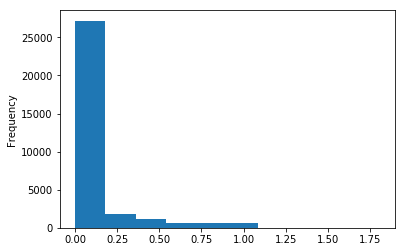

In [29]:
df.TARGET_TASK2.plot(kind="hist")

In [30]:
df.TARGET_TASK2.sort_values().head(20)

0        0.0
13564    0.0
13565    0.0
13566    0.0
13567    0.0
13568    0.0
13569    0.0
13563    0.0
13570    0.0
13572    0.0
13573    0.0
13574    0.0
13575    0.0
13576    0.0
13577    0.0
13571    0.0
13562    0.0
13561    0.0
13560    0.0
12430    0.0
Name: TARGET_TASK2, dtype: float64

In [31]:
df_p = pd.read_csv("agent_code/super_agent/p_task2_si_r.csv", index_col=0)
print(df_p.shape)

(423048, 51)


In [32]:
print(np.unique(df_p.GAME), np.unique(df_p.NAME))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129] ['random_agent_0' 'random_agent_1' 'random_agent_2' 'simple_agent']


In [23]:
df_p[(df_p.NAME != "simple_agent")  ][["GAME", "STEP", "NAME", "TARGET_TASK2"]].head()

GAME  STEP            NAME  TARGET_TASK2
385     0     0  random_agent_0     -0.043052
386     0     1  random_agent_0     -0.058494
387     0     2  random_agent_0     -0.079476
388     0     3  random_agent_0     -0.107984
389     0     4  random_agent_0     -0.146717

In [24]:
df_p[(df_p.NAME == "random_agent_0") & (df_p.GAME == 0)].head()#[["GAME", "STEP", "NAME", "TARGET_TASK2"]]

CLOSEST_DISTANCE_BOMB  CLOSEST_DISTANCE_COIN  COIN_POTENTIAL_DOWN  \
385                  0.000                  0.893                0.737   
386                  0.000                  0.000                0.000   
387                  0.464                  0.000                0.000   
388                  0.464                  0.000                0.000   
389                  1.000                  0.000                0.000   

     COIN_POTENTIAL_LEFT  COIN_POTENTIAL_RIGHT  COIN_POTENTIAL_UP  \
385                0.669                 0.871              0.669   
386                0.000                 0.000              0.000   
387                0.000                 0.000              0.000   
388                0.000                 0.000              0.000   
389                0.000                 0.000              0.000   

     CONTACT_TO_EXPLOSION_CENTER  CONTACT_TO_EXPLOSION_DOWN  \
385                            0                          0   
386                            0                          0   
387                            0                          0   
388                            0                          0   
389                            0                          0   

     CONTACT_TO_EXPLOSION_LEFT  CONTACT_TO_EXPLOSION_RIGHT  \
385                          0                           0   
386                          0                           0   
387                          0                           0   
388                          0                           0   
389                          0                           0   

     CONTACT_TO_EXPLOSION_UP  CRATES_TO_DESTROY_CENTER  \
385                        0                         3   
386                        0                         4   
387                        0                         4   
388                        0                         4   
389                        0                         4   

     CRATES_TO_DESTROY_DOWN  CRATES_TO_DESTROY_LEFT  CRATES_TO_DESTROY_RIGHT  \
385                       3                       0                        1   
386                       3                       0                        2   
387                       3                       0                        2   
388                       3                       0                        2   
389                       0                       0                        0   

     CRATES_TO_DESTROY_UP  DANGER_LEVEL_CENTER  DANGER_LEVEL_DOWN  \
385                     0                  0.0               0.00   
386                     0                  0.0               0.00   
387                     0                  0.0               0.00   
388                     0                  0.0               0.00   
389                     0                -14.0              -5.25   

     DANGER_LEVEL_LEFT  DANGER_LEVEL_RIGHT  DANGER_LEVEL_UP  DEAD_END_DOWN  \
385               0.00                0.00             0.00              1   
386               0.00                0.00             0.00              1   
387               0.00                0.00             0.00              1   
388               0.00                0.00             0.00              1   
389              -3.25               -5.25            -3.25              1   

     DEAD_END_LEFT  DEAD_END_RIGHT  DEAD_END_UP  DOF_DOWN  DOF_LEFT  \
385              0               1            0         1         0   
386              0               1            0         1         0   
387              0               1            0         1         0   
388              0               1            0         1         0   
389              0               1            0         1         0   

     DOF_RIGHT  DOF_UP  GAME  MAX_COIN_POTENTIAL_DOWN  \
385          1       0     0                        0   
386          1       0     0                        0   
387          1       0     0                        0   
388          1       0  

>> lenght of data:  243120
mean_absolute_error train-error: 0.013554
mean_squared_error train-error: 0.000756


2019-03-23 15:28:50,656:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:28:51,657:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:28:52,804:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:28:53,683:matplotlib.axes._base:DEBUG: update_title_pos


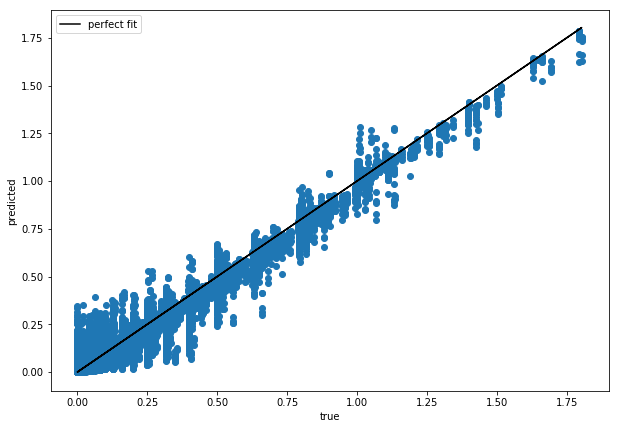

2019-03-23 15:28:55,635:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:28:56,711:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:28:58,693:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:28:59,283:matplotlib.axes._base:DEBUG: update_title_pos


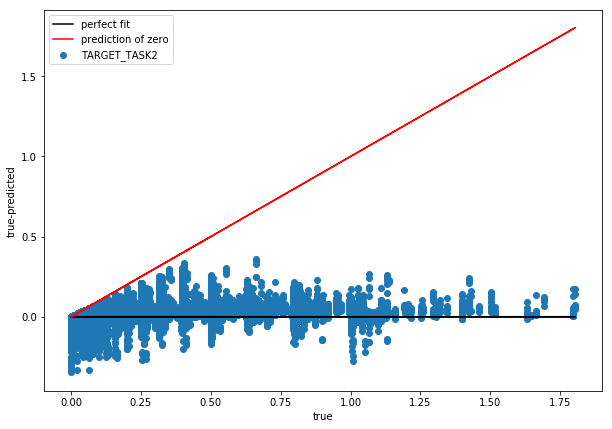

2019-03-23 15:29:00,904:matplotlib.axes._base:DEBUG: update_title_pos


mean_absolute_error test-error: 0.030670
mean_squared_error test-error: 0.003718


2019-03-23 15:29:01,409:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:29:02,038:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:29:02,325:matplotlib.axes._base:DEBUG: update_title_pos


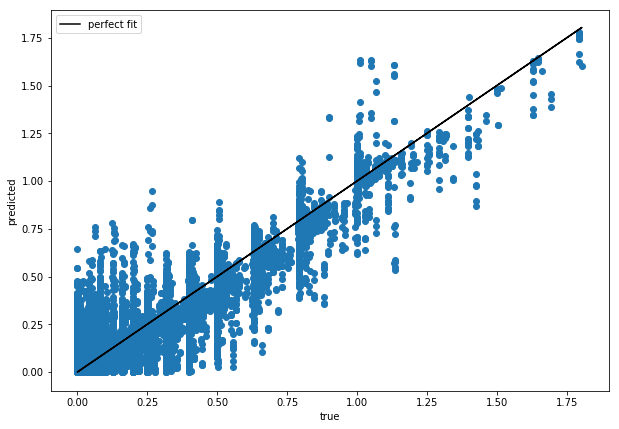

2019-03-23 15:29:02,911:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:29:03,373:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:29:03,998:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:29:04,296:matplotlib.axes._base:DEBUG: update_title_pos


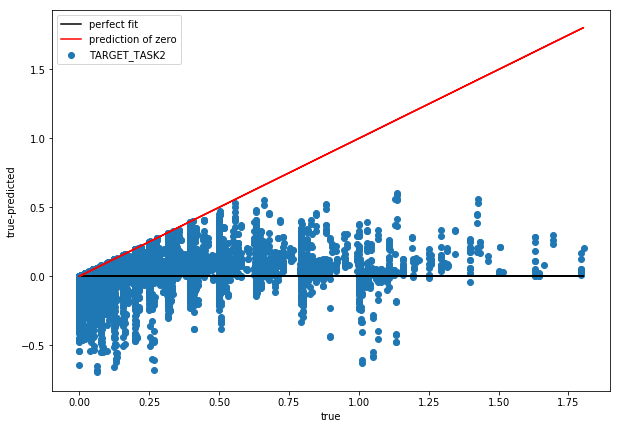

2019-03-23 15:29:04,841:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:29:04,983:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:29:05,127:matplotlib.axes._base:DEBUG: update_title_pos
2019-03-23 15:29:05,202:matplotlib.axes._base:DEBUG: update_title_pos


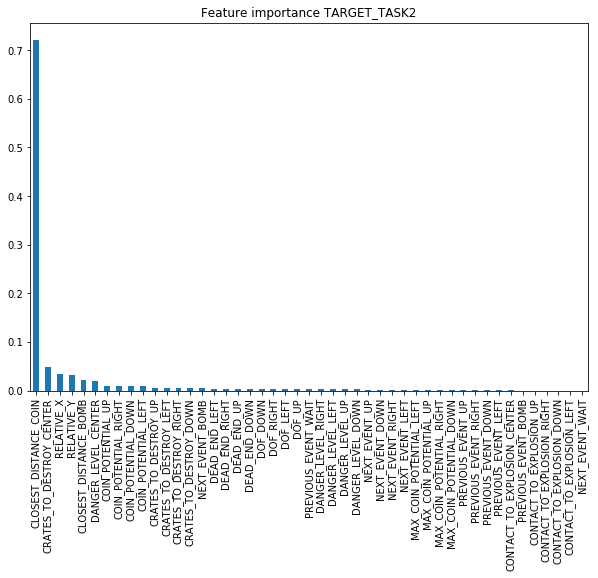

In [41]:
from prediction import evaluate_pickle
evaluate_pickle("agent_code/super_agent/p_task2_si.pickle")

In [47]:
#p.evaluate_model()

In [42]:
p.features.values

array(['CLOSEST_DISTANCE_BOMB', 'CLOSEST_DISTANCE_COIN',
       'COIN_POTENTIAL_DOWN', 'COIN_POTENTIAL_LEFT',
       'COIN_POTENTIAL_RIGHT', 'COIN_POTENTIAL_UP',
       'CONTACT_TO_EXPLOSION_CENTER', 'CONTACT_TO_EXPLOSION_DOWN',
       'CONTACT_TO_EXPLOSION_LEFT', 'CONTACT_TO_EXPLOSION_RIGHT',
       'CONTACT_TO_EXPLOSION_UP', 'CRATES_TO_DESTROY_CENTER',
       'CRATES_TO_DESTROY_DOWN', 'CRATES_TO_DESTROY_LEFT',
       'CRATES_TO_DESTROY_RIGHT', 'CRATES_TO_DESTROY_UP',
       'DANGER_LEVEL_CENTER', 'DANGER_LEVEL_DOWN', 'DANGER_LEVEL_LEFT',
       'DANGER_LEVEL_RIGHT', 'DANGER_LEVEL_UP', 'DEAD_END_DOWN',
       'DEAD_END_LEFT', 'DEAD_END_RIGHT', 'DEAD_END_UP', 'DOF_DOWN',
       'DOF_LEFT', 'DOF_RIGHT', 'DOF_UP', 'MAX_COIN_POTENTIAL_DOWN',
       'MAX_COIN_POTENTIAL_LEFT', 'MAX_COIN_POTENTIAL_RIGHT',
       'MAX_COIN_POTENTIAL_UP', 'NEXT_EVENT_BOMB', 'NEXT_EVENT_DOWN',
       'NEXT_EVENT_LEFT', 'NEXT_EVENT_RIGHT', 'NEXT_EVENT_UP',
       'NEXT_EVENT_WAIT', 'PREVIOUS_EVENT_BOMB', 'PREVIO

In [45]:
feat_importances = pd.Series(p.model.feature_importances_, index=p.features)

In [49]:
feat_importances.sort_values(ascending=False)

CLOSEST_DISTANCE_COIN          0.720457
CRATES_TO_DESTROY_CENTER       0.048670
RELATIVE_X                     0.034193
RELATIVE_Y                     0.032210
CLOSEST_DISTANCE_BOMB          0.021600
DANGER_LEVEL_CENTER            0.019720
COIN_POTENTIAL_UP              0.009339
COIN_POTENTIAL_RIGHT           0.009148
COIN_POTENTIAL_DOWN            0.009080
COIN_POTENTIAL_LEFT            0.009023
CRATES_TO_DESTROY_UP           0.006444
CRATES_TO_DESTROY_LEFT         0.006438
CRATES_TO_DESTROY_RIGHT        0.006416
CRATES_TO_DESTROY_DOWN         0.006406
NEXT_EVENT_BOMB                0.005310
DEAD_END_LEFT                  0.003524
DEAD_END_RIGHT                 0.003487
DEAD_END_UP                    0.003456
DEAD_END_DOWN                  0.003449
DOF_DOWN                       0.003383
DOF_RIGHT                      0.003365
DOF_LEFT                       0.003350
DOF_UP                         0.003345
PREVIOUS_EVENT_WAIT            0.002545
DANGER_LEVEL_RIGHT             0.002480


## create base data from directory for random base task1

In [ ]:
# os.path.exists('training_data_task1_random_base/base_data_task1_r.csv')  

In [ ]:
dir_name = "training_data_task1_random_base"
file_list = ["%s/%s" % (dir_name, i) for i in os.listdir(dir_name) if i.endswith(".pickle") and "r0" not in i]
print(len(file_list))
file_list

In [ ]:
from settings_for_ml import prediction_dict
task1_to_drop = prediction_dict["task1"]["to_drop"]
target = prediction_dict["task1"]["target"]
cut_off = prediction_dict["task1"]["cut_off"]
base_data_name = prediction_dict["task1"]["base_data_name"]
prediciton_path = prediction_dict["task1"]["base_prediction_path"]
index = prediction_dict["task1"]["index"]
prediction_name = prediction_dict["task1"]["base_prediction_name"]
target, prediction_name

In [ ]:
p = create_base_prediction(file_list, 
                           base_data_name="base_data_task1_r.csv",
                           target=target, 
                           cut_off=cut_off, 
                           to_drop=task1_to_drop, 
                           index=index, 
                           prediction_path=prediciton_path,
                           prediction_name="p_task1_r.pickle")

In [ ]:
p.evaluate_model()

In [ ]:
from prediction import evaluate_pickle
evaluate_pickle("agent_code/super_agent/p_task1_r.pickle")

In [ ]:
p.evaluate_model()

## create base data from directory for simple base

In [ ]:
dir_name = "training_data_task1_simple_base"
file_list = ["%s/%s" % (dir_name, i) for i in os.listdir(dir_name) if i.endswith(".pickle") and "si1" in i]
print(len(file_list))
file_list[0:10]

In [ ]:
from settings_for_ml import prediction_dict
task1_to_drop = prediction_dict["task1"]["to_drop"]
target = prediction_dict["task1"]["target"]
cut_off = prediction_dict["task1"]["cut_off"]
base_data_name = prediction_dict["task1"]["base_data_name"]
prediciton_path = prediction_dict["task1"]["base_prediction_path"]
index = prediction_dict["task1"]["index"]
prediction_name = prediction_dict["task1"]["base_prediction_name"]
target, prediction_name

In [ ]:
p = create_base_prediction(file_list, 
                           base_data_name="base_data_task1_si.csv",
                           target=target, 
                           cut_off=cut_off, 
                           to_drop=task1_to_drop, 
                           index=index, 
                           prediction_path=prediciton_path,
                           prediction_name="p_task1_si.pickle")

In [ ]:
p.evaluate_model()

## simple and random agents as base data 

In [ ]:
dir_name = "training_data_task1_simple_random_base"
file_list_si_r = ["%s/%s" % (dir_name, i) for i in os.listdir(dir_name) if i.endswith(".pickle")]
print(len(file_list_si_r))
file_list_si_r[0:10]

In [ ]:
p = create_base_prediction(file_list_si_r, 
                           base_data_name="base_data_task1_si_r.csv",
                           target=target, 
                           cut_off=cut_off, 
                           to_drop=task1_to_drop, 
                           index=index, 
                           prediction_path=prediciton_path,
                           prediction_name="p_task1_si_r.pickle")

In [ ]:
p.evaluate_model()

In [ ]:
df_p_rsi = pd.read_csv("agent_code/super_agent/p_task1_si_r.csv")

In [ ]:
print(df_p_rsi.shape)

In [ ]:
df_p_rsi.TARGET_TASK1.plot(kind="hist")

In [ ]:
# est base prediction df
df_p_r = pd.read_csv("agent_code/super_agent/p_task1_r.csv", index_col=0)
print(df_p_r.shape)
df_p_r.head()


In [ ]:
df_p_r.TARGET_TASK1.plot(kind="hist")

In [ ]:
# est base prediction df
df_p_si = pd.read_csv("agent_code/super_agent/p_task1_si.csv", index_col=0)
print(df_p_si.shape)
display(df_p_si.head())
df_p_si.TARGET_TASK1.plot(kind="hist")

In [ ]:
df = pd.read_csv("training_data_task1_random_base/base_data_task1_r.csv", index_col=0)
important_columns = ["NAME", "STEP", "X", "Y", "TARGET_TASK1", "CURRENT_SCORE", "NEXT_SCORE"] + [i for i in df.columns if i.startswith(("COIN_POT", "NEXT_EVENT"))]

In [ ]:
df.shape

In [ ]:
df[important_columns][(df.CURRENT_SCORE == 0) & (df.NEXT_SCORE == 1)].head(10)

In [ ]:
df[df]

In [ ]:
df.TARGET_TASK1.plot(kind="hist")

In [ ]:
df[df.TARGET_TASK1 > 0][["NAME", "X", "Y", "GAME", "CURRENT_SCORE", "TARGET_TASK1", "STEP"] + [i for i in df.columns if i.startswith(("NEXT"))]].head(20)

In [ ]:
df[(df.CURRENT_SCORE == 0) & (df.NEXT_SCORE == 1)][["NAME", "GAME", "CURRENT_SCORE", "TARGET_TASK1", "STEP"] + [i for i in df.columns if i.startswith(("NEXT", "COIN", "MAX_COIN"))]].head(7)

In [ ]:
file_list[0:10]

In [ ]:
filename = 'training_data_task1_random_base/time1553250923732688crates0r4su0si0q0u0maxsteps400.pickle'
df_test = dh.pickle_to_df(filename)

In [ ]:
df_test[df_test.STEP.isin([0,1])][important_columns]

In [ ]:
df_test[(df_test.CURRENT_SCORE == 0) & (df_test.NEXT_SCORE == 1)][["NAME", "X","Y", "CURRENT_SCORE", "NEXT_SCORE","TARGET_TASK1", "STEP"] + [i for i in df.columns if i.startswith(("NEXT_EVENT", "COIN", "MAX_COIN"))]]


In [ ]:
df_test[df_test.STEP == 63].head()[important_columns].head() 



In [ ]:
infile = open(filename, 'rb')
d = pickle.load(infile)

In [ ]:
d.keys()

In [ ]:
arena = dh.manipulate_arena(d["coins"], [d["%s_xy" % a] for a in d["agents"]], d["bombs"], d["arena"])

In [ ]:
i = 0
df_test[(df_test.STEP <= i+1) & (df.STEP >= i-1) & (df.NAME == "random_agent_0")][important_columns]

In [ ]:
print(i)
plt.imshow(arena[:,:,i])
plt.show()
i += 1

print(i)
plt.imshow(arena[:,:,i])
plt.show()
i += 1

print(i)
plt.imshow(arena[:,:,i])
plt.show()

In [ ]:
# debugging
agent = "random_agent_2"
step = 148

In [ ]:
df_test[(df_test.NAME == agent) & (df_test.STEP >= step-1) & (df_test.STEP <= step+1)][important_columns]

In [ ]:
i = step -1
print(i)
plt.imshow(arena[:,:,i])
plt.show()
i += 1

print(i)
plt.imshow(arena[:,:,i])
plt.show()
i += 1

print(i)
plt.imshow(arena[:,:,i])
plt.show()

In [ ]:
df[df.COIN_POTENTIAL_UP > 1].head()

In [ ]:
p = create_base_prediction()

In [ ]:
"si1" in "time1553091795942235crates0r0su0si1q0u0maxsteps400.pickle"
"r1" in "time1553091795942235crates0r0su0si1q0u0maxsteps400.pickle"

In [ ]:
os.listdir("training_data_task1")[:3]

In [ ]:
dir_name = "training_data_task1"
file_path_list = ["%s/%s" % (dir_name, i) for i in os.listdir(dir_name) if i.endswith("pickle")]
file_path_list

## test retrainin

In [ ]:
from run_and_retrain import Run
from settings import settings

In [ ]:
settings["n_rounds"] = 3

In [ ]:
simple_run = Run("training_data_task1", **prediction_dict["task1"], iterations=3)

In [ ]:
simple_run.run()

In [ ]:
df = pd.read_csv("agent_code/super_agent/2019-03-22_09-54_p_task1_si.csv", index_col=0)

In [ ]:
df.shape

In [ ]:
np.unique(df["NAME"])

In [ ]:
df[df.NAME == "super_agent"].TARGET_TASK1.hist(bins=20)
plt.xlabel("Target Task1")
plt.show()

In [ ]:
df[df.NAME == "simple_agent"].TARGET_TASK1.hist(bins=20)
plt.xlabel("Target Task1")

plt.show()

In [ ]:
from prediction import evaluate_pickle

In [ ]:
evaluate_pickle("agent_code/super_agent/2019-03-22_09-54_p_task1_si.pickle")

In [ ]:
#"prediction_data.csv"

In [ ]:
#print(simple_run.scores, simple_run.scores_std)
#print(simple_run.modified_scores, simple_run.modified_scores_std)

In [ ]:
#df = dh.pickle_to_df("training_data_task1/time15530918059545999crates0r0su0si1q0u0maxsteps400.pickle")

In [ ]:
[i for i in os.listdir("training_data_task1") if i.endswith("csv")]

In [ ]:
os.listdir("agent_code/super_agent")

In [ ]:
df[["CLOSEST_DISTANCE_COIN", "STEP", "CURRENT_SCORE"]].head(10)

In [ ]:
df.drop(set(prediction_dict["task1"]["to_drop"] + prediction_dict["task1"]["index"]) & set(df.columns), axis=1, inplace=True)

In [ ]:
X, y = df.drop("TARGET_TASK1", axis=1), df["TARGET_TASK1"]

In [ ]:
#df_base_temp = dm.create_base_data_from_files(file_path_list[0:3], save=False)

In [ ]:
#p = create_base_prediction(file_path_list, prediction_name = "p_task1_r.pickle", base_data_name="base_data_task1_r.csv")

In [ ]:
from time import time
t0 = time()


In [ ]:
print(time()-t0)

In [ ]:
# agent_code/super_agent/2019-03-21_12-36_p_task1.pickle
evaluate_pickle("agent_code/super_agent/2019-03-21_12-36_p_task1.pickle")

In [ ]:
# agent_code/super_agent/2019-03-21_12-49_p_task1.pickle
evaluate_pickle("agent_code/super_agent/2019-03-21_12-49_p_task1.pickle")

In [ ]:
evaluate_pickle("agent_code/super_agent/2019-03-21_12-49_p_task1.pickle")

In [ ]:
from prediction import evaluate_pickle
evaluate_pickle("agent_code/super_agent/2019-03-21_11-49_p_task1.pickle")

In [ ]:
[i for i in os.listdir("agent_code/super_agent/") if i.endswith("csv")]

In [ ]:
df = pd.read_csv("agent_code/super_agent/p_task1.csv", index_col=0)
df.shape

In [ ]:
df.head(10)

In [ ]:
file_path_list

In [ ]:
scores = []
punishment=0.05
modified_scores = []
for i in np.unique(df_base_temp.GAME): 
    scores.append(max(df_base_temp[df_base_temp.GAME == i].CURRENT_SCORE))
    modified_scores.append(max(df_base_temp[df_base_temp.GAME == i].CURRENT_SCORE) + punishment*len(df_base_temp[df_base_temp.GAME == i]))
scores, modified_scores

In [ ]:
df_base_temp[["CURRENT_SCORE", "GAME"]]

In [ ]:
with open('%s' % file_path_list[9], 'rb') as f:
    d = pickle.load(f)
    agent = d["agents"][0]
    print(d["%s_last_event" % agent])